In [26]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from collections import  Counter

In [15]:
class item:
  def __init__(self, vector, label):
    self.vector = vector
    self.label = label

  def __repr__(self):
    return f"{self.vector}{self.label}"

data = []

with open("iris.data", "r") as f:
  for line in f:
    lines = f.readlines()[:-1]
    for line in lines:
      items = line.strip().split(",")
      vector = [float(x) for x in items[:4]]
      answer = items[4]
      data.append(item(vector, answer))

for item in data:
  print(item.vector, item.label)

[4.9, 3.0, 1.4, 0.2] Iris-setosa
[4.7, 3.2, 1.3, 0.2] Iris-setosa
[4.6, 3.1, 1.5, 0.2] Iris-setosa
[5.0, 3.6, 1.4, 0.2] Iris-setosa
[5.4, 3.9, 1.7, 0.4] Iris-setosa
[4.6, 3.4, 1.4, 0.3] Iris-setosa
[5.0, 3.4, 1.5, 0.2] Iris-setosa
[4.4, 2.9, 1.4, 0.2] Iris-setosa
[4.9, 3.1, 1.5, 0.1] Iris-setosa
[5.4, 3.7, 1.5, 0.2] Iris-setosa
[4.8, 3.4, 1.6, 0.2] Iris-setosa
[4.8, 3.0, 1.4, 0.1] Iris-setosa
[4.3, 3.0, 1.1, 0.1] Iris-setosa
[5.8, 4.0, 1.2, 0.2] Iris-setosa
[5.7, 4.4, 1.5, 0.4] Iris-setosa
[5.4, 3.9, 1.3, 0.4] Iris-setosa
[5.1, 3.5, 1.4, 0.3] Iris-setosa
[5.7, 3.8, 1.7, 0.3] Iris-setosa
[5.1, 3.8, 1.5, 0.3] Iris-setosa
[5.4, 3.4, 1.7, 0.2] Iris-setosa
[5.1, 3.7, 1.5, 0.4] Iris-setosa
[4.6, 3.6, 1.0, 0.2] Iris-setosa
[5.1, 3.3, 1.7, 0.5] Iris-setosa
[4.8, 3.4, 1.9, 0.2] Iris-setosa
[5.0, 3.0, 1.6, 0.2] Iris-setosa
[5.0, 3.4, 1.6, 0.4] Iris-setosa
[5.2, 3.5, 1.5, 0.2] Iris-setosa
[5.2, 3.4, 1.4, 0.2] Iris-setosa
[4.7, 3.2, 1.6, 0.2] Iris-setosa
[4.8, 3.1, 1.6, 0.2] Iris-setosa
[5.4, 3.4,

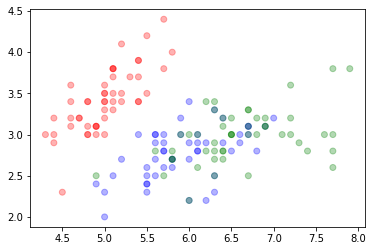

In [16]:
X = [item.vector[0] for item in data]
Y = [item.vector[1] for item in data]

species = {"Iris-setosa":"red", "Iris-versicolor":"blue", "Iris-virginica":"green"}

C = [species[item.label] for item in data]

plt.scatter(X, Y, c=C, alpha=0.3)
plt.show()

In [22]:
random.shuffle(data)

train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

print(len(data), len(train), len(test))

149 119 30


In [27]:
def distance(p1, p2):
  return sum((a-b) ** 2 for a,b in zip(p1, p2)) ** 0.5

def knn_classify(k, query, train):
  knns = sorted((distance(query, item.vector), item.label) for item in train)[:k]
  t = Counter(x[1] for x in knns).most_common(1)

  return t[0][0]


print(test[0])
answer = knn_classify(3, test[0].vector, train)

[5.1, 3.8, 1.6, 0.2]Iris-setosa


'Iris-setosa'

100%|██████████| 100/100 [00:15<00:00,  6.65it/s]


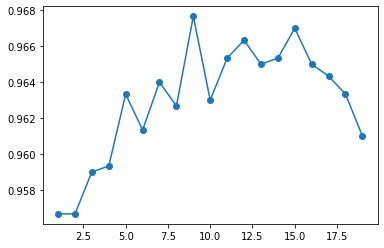

In [31]:
corrects = [0] * 20
num_trials = 100
train_size = int(len(data) * 0.8)

for _ in tqdm(range(num_trials)):

  random.shuffle(data)
  train = data[:train_size]
  test = data[train_size:]

  for k in range(1, 20):
    for item in test:
      answer = knn_classify(k, item.vector, train)
      if answer == item.label:
        corrects[k] += 1

accurancies = [c / (len(test) * num_trials) for c in corrects]

accurancies

plt.plot(range(1,20), accurancies[1:], 'o-')
plt.show()